# Advanced tutorial: Converting data to the frequency domain and reconstructing there

## Overview

<div class="admonition important alert alert-block alert-success">

🚀 **You will learn how to:**

<ul>
  <li>
  
  Import `y-tal`, load capture data, and convert it to the Fourier domain.
  
  </li>
  <li>
  
  Use the `pf_dev` reconstruction implementation with data in frequency space.
  
  </li>
</ul>

</div>

You might want to work in frequency space if your data is very large and you work with phasor-field-based methods (it's lighter to store ~100 phasors than the full ~4000 time bin temporal respose).

<div class="admonition important alert alert-block alert-warning">

We use the `z-single-64x64-gpu` dataset because it has `t_start = 0`, required for this frequency conversion. Remember you can download that data and put it in the corresponding folder.

</div>

In [6]:
import tal

data = tal.io.read_capture('data/tal/z-single-64x64-gpu.hdf5')

In [7]:
# because this is a test scene, we know the hidden geometry
# is located at Z = 1
# this volume_xyz is coplanar to the relay wall (rw) at Z=1
volume_xyz = tal.reconstruct.get_volume_project_rw(data, depths=[1.0,])
print(volume_xyz.shape)

(64, 64, 1, 3)


(2048, 64, 64) float32
HFormat.T_Sx_Sy


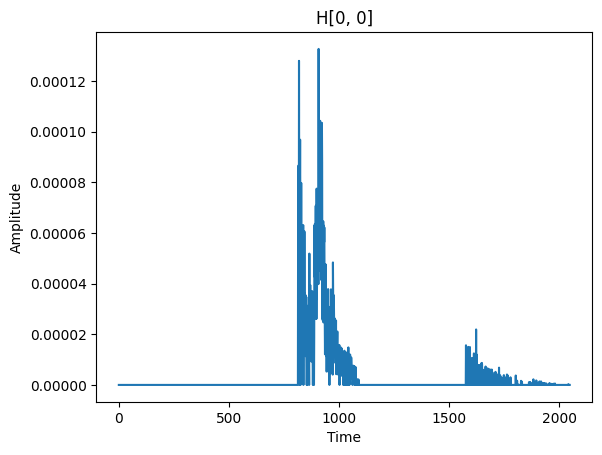

In [8]:
print(data.H.shape, data.H.dtype)
print(data.H_format)
import matplotlib.pyplot as plt
plt.plot(data.H[:, 0, 0])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('H[0, 0]')
plt.show()

In [9]:
tal.reconstruct.pf_dev.convert_data_to_fourier(data, wl_mean=0.06, wl_sigma=0.06, border='zero')

tal.reconstruct.pf_dev: Using 128 wavelengths from 0.0399m to 0.1204m


(128, 64, 64) complex64
HFormat.F_Sx_Sy


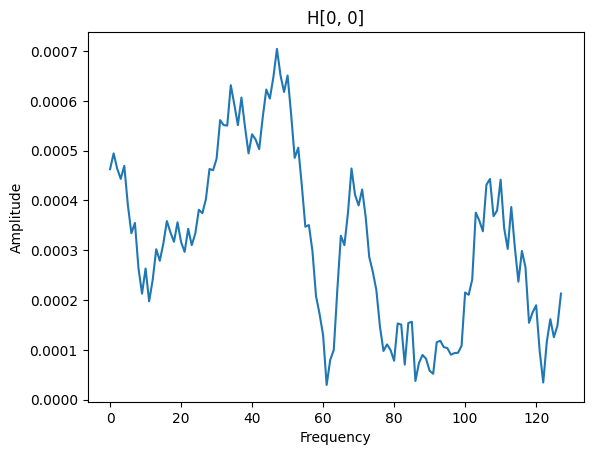

In [10]:
print(data.H.shape, data.H.dtype)
print(data.H_format)
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.abs(data.H[:, 0, 0]))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('H[0, 0]')
plt.show()

tal.reconstruct.utils: Assuming that volume_xyz is X_Y_Z_3
tal.reconstruct.utils: Optimizing for camera convolutions.
tal.reconstruct.pf_dev: Using 128 wavelengths from 0.0399m to 0.1204m
tal.reconstruct.pf_dev: projector_focus_mode=confocal
tal.reconstruct.pf_dev: Skipping FFT for H_0
tal.reconstruct.pf_dev: Will use divide_frequencies implementation


tal.reconstruct.pf_dev divide-frequency: 100%|██████████| 128/128 [00:00<00:00, 746.33it/s]


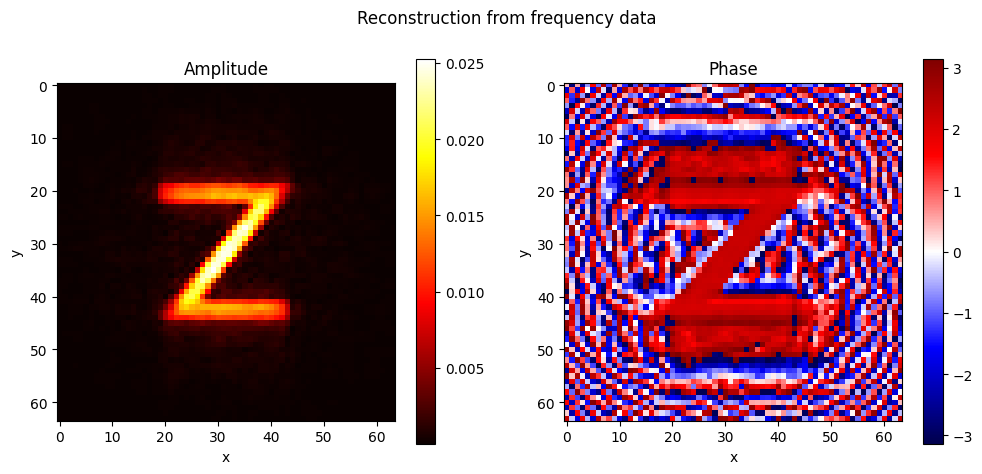

In [11]:
# You need to use pf_dev, not fbp, because the data is in the frequency domain
# VERY IMPORTANT that you pass the same wl_mean/wl_sigma/border as you used in convert_data_to_fourier
H_1 = tal.reconstruct.pf_dev.solve(data,
                                   wl_mean=0.06, wl_sigma=0.06, border='zero',
                                   volume_xyz=volume_xyz, camera_system=tal.enums.CameraSystem.DIRECT_LIGHT)
tal.plot.amplitude_phase(H_1, title='Reconstruction from frequency data')